# Conveiro CDFS tutorial

## CDFS

This method is based on blog avalaible on:
* https://distill.pub/2017/feature-visualization/
* https://github.com/tensorflow/lucid

We will be using tensornets to create our model.

In [1]:
import tensorflow as tf
import tensornets as nets
import conveiro.cdfs as cdfs

We need to set the size of generated images.

In [2]:
input_t, decorrelated_image_t, coeffs_t = cdfs.setup(224)

We create our model with input_t. Model variable in this case represents logits layer of our model but we don't need it in this case. Even if we wanted to visualize individual classes it is better to use layer before logits, otherwise we will get very distorted output, because it is often easier to just minimize other classes instead of optimizing one.

We can use any network we want, as long as we can feed image into it.

In [3]:
model = nets.Inception1(input_t)

graph = tf.get_default_graph()

sess = tf.Session()

In [4]:
sess.run(model.pretrained())

We load pretrained model for out network but again you can use any network you want. 

In [5]:
objective = graph.get_tensor_by_name("inception1/block3b/concat:0")

It is neccessary to choose our objective. With it we can select what neuron/layer to visualize. You can choose any objective as long as we can use the input of network to optimize that objective.  

In [9]:
image = cdfs.render_image(sess, decorrelated_image_t, coeffs_t, objective[..., 55], 0.01, num_steps=2048)

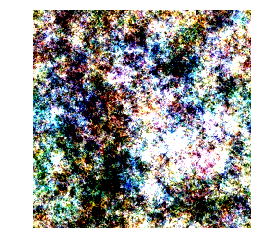

In [10]:
cdfs.show_image(cdfs.process_image(image))

At this point you have basic tools to visualize your networks but you can do more. For example it is intersting to try what happens when you try to optimize for entire layer.

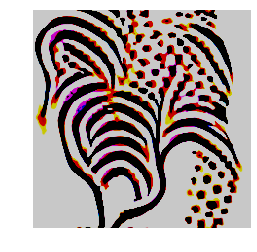

In [8]:
image = cdfs.render_image(sess, decorrelated_image_t, coeffs_t, objective[...], 0.01)
cdfs.show_image(cdfs.process_image(image))

At this point you can see that pattern emerged from filter. You can use such patterns to better understand how your networks work.